In [1]:
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Use Pandas to import a csv file.
# data = pd.read_csv('csvFile.csv', index_col=0)

# Or create a Pandas DataFrame
dates = pd.date_range('20180801', periods=31)
data = pd.DataFrame(np.random.randint(10,100,(31,2)), index=dates, columns=list('AB'))

In [3]:
data.reset_index().head()

,index,A,B
0,2018-08-01,50,64
1,2018-08-02,47,84
2,2018-08-03,59,34
3,2018-08-04,50,40
4,2018-08-05,42,39


In [4]:
data.describe()

,A,B
count,31.000000,31.000000
mean,48.516129,54.548387
std,21.132709,27.937834
min,10.000000,11.000000
25%,36.000000,29.500000
50%,48.000000,57.000000
75%,63.500000,76.500000
max,80.000000,98.000000


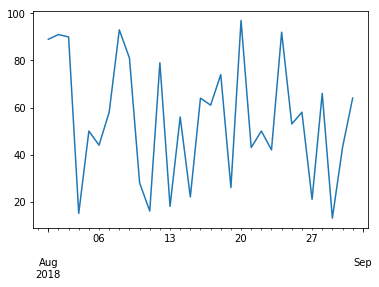

In [43]:
# data['A'].reset_index().plot.bar()
data['A'].plot()

Confidence Interval for the Repeated Measures t-Test
(source: Statistics in a Nutshell pp166)

$CI_{1-\alpha} = \bar{x} \pm (t_{\frac{\alpha}{2}.df})(\frac{s_d}{\sqrt{n}})$

where:

$\alpha$ is the probability of exceeding the critical value (1 - 0.95 for 95% CI.)

$CI_{1-\alpha}$ is the confidence interval (95% confidence interval for an $\alpha$ of 0.05.)

$\bar{x}$ is the sample mean.

$t_{\frac{\alpha}{2}.df}$ is the upper critical t-value for the degrees of freedom ($df$) (halve the $\alpha$ level if using a single-tailed table. i.e. for 95%CI, $\alpha = 0.05$. for a single tailed t-value table, use $\alpha = 0.025$ otherwise for a two-tailed t-value table use $\alpha = 0.05$.)

$s_d$ is the standard deviation of the sample.

$n$ is the number of samples.

In [44]:
xbar = data['A'].mean()
n = data['A'].count()
t = 2.042 # t-value for 30 df and 0.05 two-tailed.
stdev = data['A'].std()
pm_int = t*stdev/np.sqrt(n)
xbar, n, t, stdev, pm_int
# 95% Confidence Interval
#print(xbar, "+/-", pm_int, "(", xbar - pm_int, ",", xbar + pm_int, ")")
print("mean: {:.0f} +/- {:.0f} [{:.0f}, {:.0f}]".format(xbar,pm_int,xbar - pm_int,xbar + pm_int))

mean: 55 +/- 10 [45, 64]
